In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
tight_psf = np.genfromtxt('elena_cats/tight_seq_psf.dat',names=True)
tight_d6 = np.genfromtxt('hor1dir6pix/tight_seq_d6.dat',names=True)
tight_d4 = np.genfromtxt('hor1dir0501/tight_seq_d4.dat',names=True) 

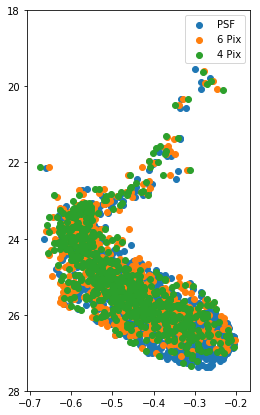

In [3]:
fig,ax = plt.subplots(figsize=(4,7))

ax.scatter(tight_psf['m606c']-tight_psf['m814c'],tight_psf['m606c'],label='PSF')
ax.scatter(tight_d6['mean_f606w']-tight_d6['mean_f814w'],tight_d6['mean_f606w'],label='6 Pix')
ax.scatter(tight_d4['mean_f606w']-tight_d4['mean_f814w'],tight_d4['mean_f606w'],label='4 Pix')


ax.legend()
ax.set_ylim(28,18)
plt.show()

In [4]:
col_psf = tight_psf['m606c'] - tight_psf['m814c']
col_d4 = tight_d4['mean_f606w'] - tight_d4['mean_f814w']
col_d6 = tight_d6['mean_f606w'] - tight_d6['mean_f814w']

In [27]:
mbins = np.arange(22, 25, 0.5)

In [28]:
dig_psf = np.digitize(tight_psf['m814c'], mbins)
dig_d4 = np.digitize(tight_d4['mean_f814w'], mbins)
dig_d6 = np.digitize(tight_d6['mean_f814w'], mbins)

In [29]:
col_mean_p = np.zeros((len(mbins)-1))
col_mean_6 = np.zeros((len(mbins)-1))
col_mean_4 = np.zeros((len(mbins)-1))
for ii in range(1,len(mbins)):
    col_mean_p[ii-1] = np.median(col_psf[np.argwhere(dig_psf==ii)])
    col_mean_6[ii-1] = np.median(col_d6[np.argwhere(dig_d6==ii)])
    col_mean_4[ii-1] = np.median(col_d4[np.argwhere(dig_d4==ii)])
    
    
#     [data3a[digitized3a == i].mean()              for i in range(1, len(bins))]

In [30]:
bin_means = [tight_psf['m814c'][dig_psf== i].mean() for i in range(1, len(mbins))]

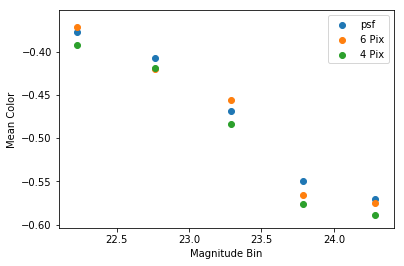

In [31]:
fig,ax = plt.subplots()

ax.scatter(bin_means,col_mean_p,label='psf')
ax.scatter(bin_means,col_mean_6,label='6 Pix')
ax.scatter(bin_means,col_mean_4,label='4 Pix')

ax.legend()
ax.set_ylabel('Mean Color')
ax.set_xlabel('Magnitude Bin')

plt.show()

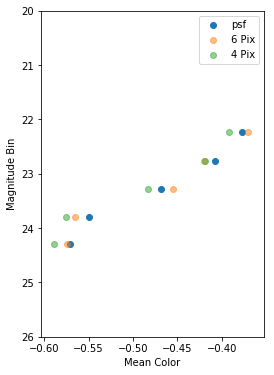

In [32]:
fig,ax = plt.subplots(figsize=(4,6))

ax.scatter(col_mean_p,bin_means,label='psf',alpha=1)
ax.scatter(col_mean_6,bin_means,label='6 Pix',alpha=0.5)
ax.scatter(col_mean_4,bin_means,label='4 Pix',alpha=0.5)

ax.legend()
ax.set_xlabel('Mean Color')
ax.set_ylabel('Magnitude Bin')
ax.set_ylim(26,20)

plt.show()

In [33]:
psf_d6 = col_mean_p - col_mean_6
psf_d4 = col_mean_p - col_mean_4

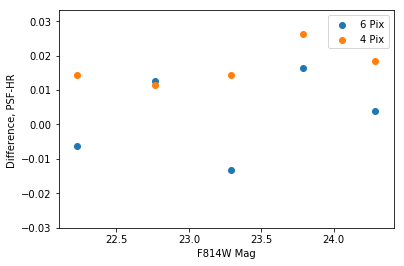

In [34]:
fig,ax = plt.subplots()

ax.scatter(bin_means,psf_d6,label='6 Pix')
ax.scatter(bin_means,psf_d4,label='4 Pix')

ax.legend()
ax.set_ylabel('Difference, PSF-HR ')
ax.set_xlabel('F814W Mag')

plt.show()

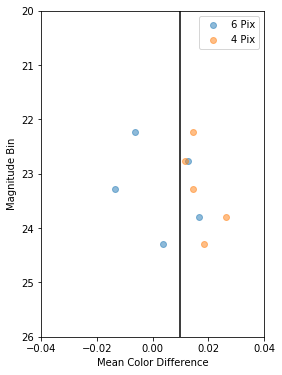

In [35]:
fig,ax = plt.subplots(figsize=(4,6))

ax.scatter(psf_d6,bin_means,label='6 Pix',alpha=0.5)
ax.scatter(psf_d4,bin_means,label='4 Pix',alpha=0.5)

ax.legend()
ax.set_xlabel('Mean Color Difference')
ax.set_ylabel('Magnitude Bin')
ax.set_ylim(26,20)
ax.vlines(0.01,20,26)
ax.set_xlim(-0.04,0.04)

plt.show()

In [36]:
print('Mean:',np.nanmean(psf_d6))
print('Median:',np.nanmedian(psf_d6))

Mean: 0.0026769999999988413
Median: 0.003864999999999341


In [37]:
print('Mean:',np.nanmean(psf_d4))
print('Median:',np.nanmedian(psf_d4))

Mean: 0.017024000000000684
Median: 0.014515000000001166
